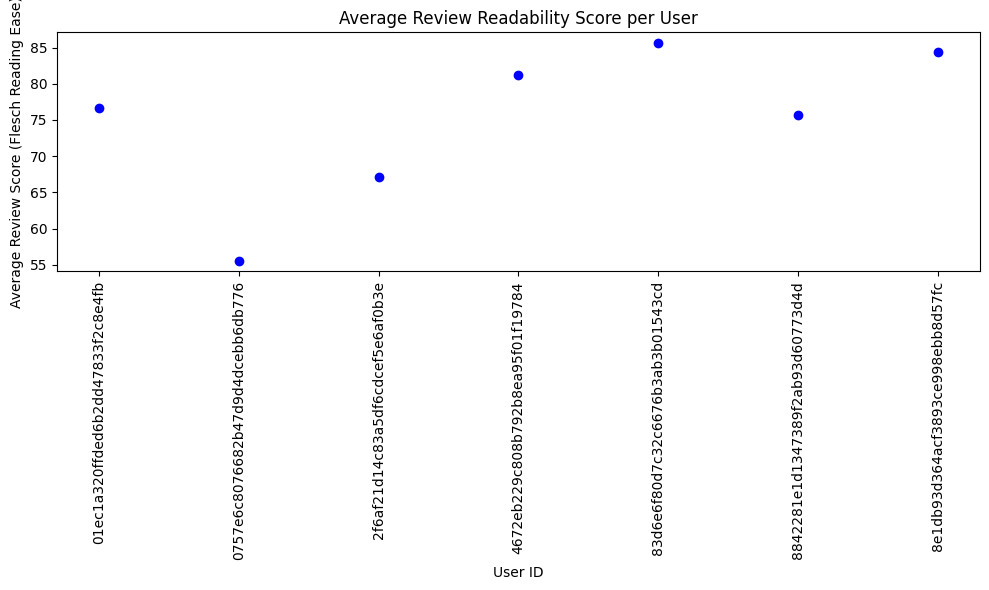

In [20]:

# Variables rating, reading level, spoiler, reading time, genre

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textstat  # Example for applying text readability metric

# Read the JSON file (assuming it's large, you may use chunks if needed)
chunk_size = 1000
chunks = pd.read_json('./data/goodreads_reviews_spoiler_raw.json', lines=True, chunksize=chunk_size)

for chunk in chunks:
    df = chunk
    break  # Stop after reading the first chunk

# Example function to apply to each review (you can change this based on your needs)
def review_function(review_text):
    # Here we use Flesch Reading Ease as an example
    return textstat.flesch_reading_ease(review_text)

# Group by 'user_id'
grouped = df.groupby('user_id')

# Prepare to store average values per user
user_ids = []
average_scores = []

# Loop through each user and calculate the average of the function results
for user_id, group in grouped:
    # Apply the function to each review for this user
    scores = group['review_text'].apply(review_function)
    
    # Calculate the average score for the user
    avg_score = np.mean(scores)
    
    # Store the user ID and their average score
    user_ids.append(user_id)
    average_scores.append(avg_score)

# Convert results to a DataFrame for easy plotting
results = pd.DataFrame({
    'user_id': user_ids,
    'average_score': average_scores
})

# Plotting the average score for each user
plt.figure(figsize=(10, 6))
plt.scatter(results['user_id'], results['average_score'], color='blue')

# Add labels and title
plt.xlabel('User ID')
plt.ylabel('Average Review Score (Flesch Reading Ease)')
plt.title('Average Review Readability Score per User')

# Rotate x labels if there are too many users
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()

In [17]:
import textstat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# chunk_size = 100
# chunks = pd.read_json('./data/goodreads_reviews_fantasy_paranormal.json', lines=True, chunksize=chunk_size)
chunk_size = 100
chunks = pd.read_json('./data/goodreads_reviews_spoiler_raw.json', lines=True, chunksize=chunk_size)

for chunk in chunks:
    df = chunk
    break  # Stop after reading the first chunk
print(df.columns)
sdf = df['review_text']
print(sdf)
for sentence in sdf:
    print(sentence)


Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text',
       'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes',
       'n_comments'],
      dtype='object')
0     This is a special book. It started slow for ab...
1     Recommended by Don Katz. Avail for free in Dec...
2     A fun, fast paced science fiction thriller. I ...
3     Recommended reading to understand what is goin...
4     I really enjoyed this book, and there is a lot...
                            ...                        
95    3.5 - 4 stars \n Beautiful and poignant yet ve...
96    4.5 - 5 Stars!! \n "When life happened, it did...
97    4.5 Captivating Stars!!! \n "When truth is rep...
98    Such a sweet and sexy story! Highly recommend ...
99    "Now I know how much there is to be afraid of ...
Name: review_text, Length: 100, dtype: object
This is a special book. It started slow for about the first third, then in the middle third it started to get interesting, then the last third blew my min

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text',
       'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes',
       'n_comments'],
      dtype='object')


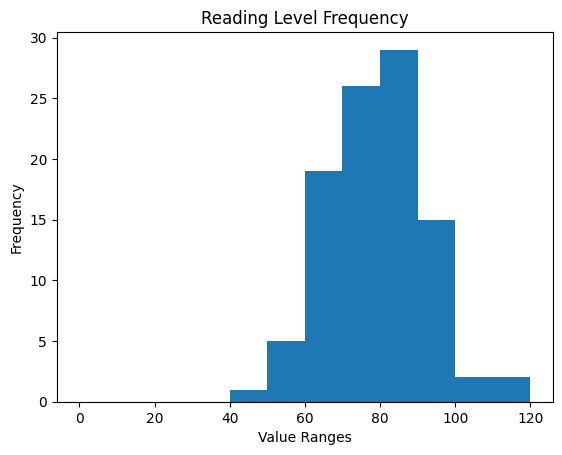

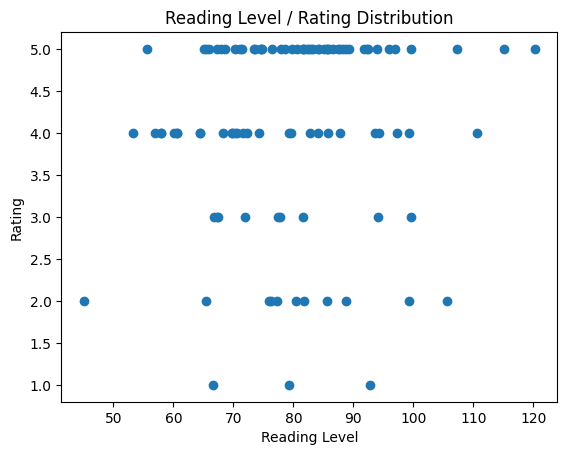

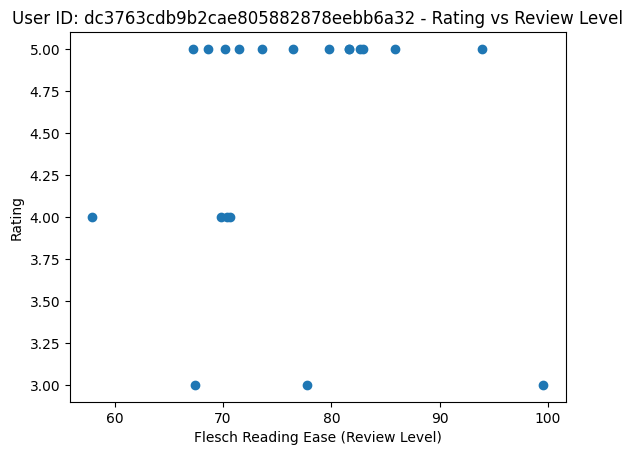

[(70.23, 5), (81.67, 5), (76.42, 5), (70.33, 4), (67.38, 3), (85.89, 5), (67.25, 5), (82.95, 5), (69.82, 4), (73.58, 5), (77.74, 3), (70.63, 4), (93.95, 5), (68.6, 5), (57.95, 4), (71.48, 5), (99.57, 3), (79.8, 5), (82.65, 5), (81.63, 5)]
{'72fb0d0087d28c832f15776b0d936598': [(77.23, 2), (71.65, 4), (65.52, 2), (80.41, 2)], 'f8a89075dc6de14857561522e729f82c': [(85.62, 5)], '012515e5802b2e0f42915118c90fa04b': [(99.57, 5), (99.23, 4), (74.53, 5), (95.88, 5), (88.74, 5), (56.93, 4), (85.59, 5), (79.26, 4), (81.63, 3), (94.25, 4), (99.23, 2), (82.78, 4), (74.35, 4), (80.62, 5), (77.91, 5), (87.72, 5), (88.33, 5), (82.34, 5), (115.13, 5), (120.21, 5), (92.22, 5), (110.56, 4), (87.42, 5), (97.2, 4), (83.32, 5), (65.89, 5), (75.91, 2), (86.6, 5), (81.73, 2), (96.99, 5), (65.39, 5), (93.64, 4), (85.79, 4), (71.04, 5)], 'f4d16ea4ac59af59d257631398af39f4': [(92.42, 5), (85.59, 2), (55.54, 5), (77.37, 3)], '01ec1a320ffded6b2dd47833f2c8e4fb': [(78.55, 5), (84.27, 5), (85.08, 5), (84.17, 4), (72.32

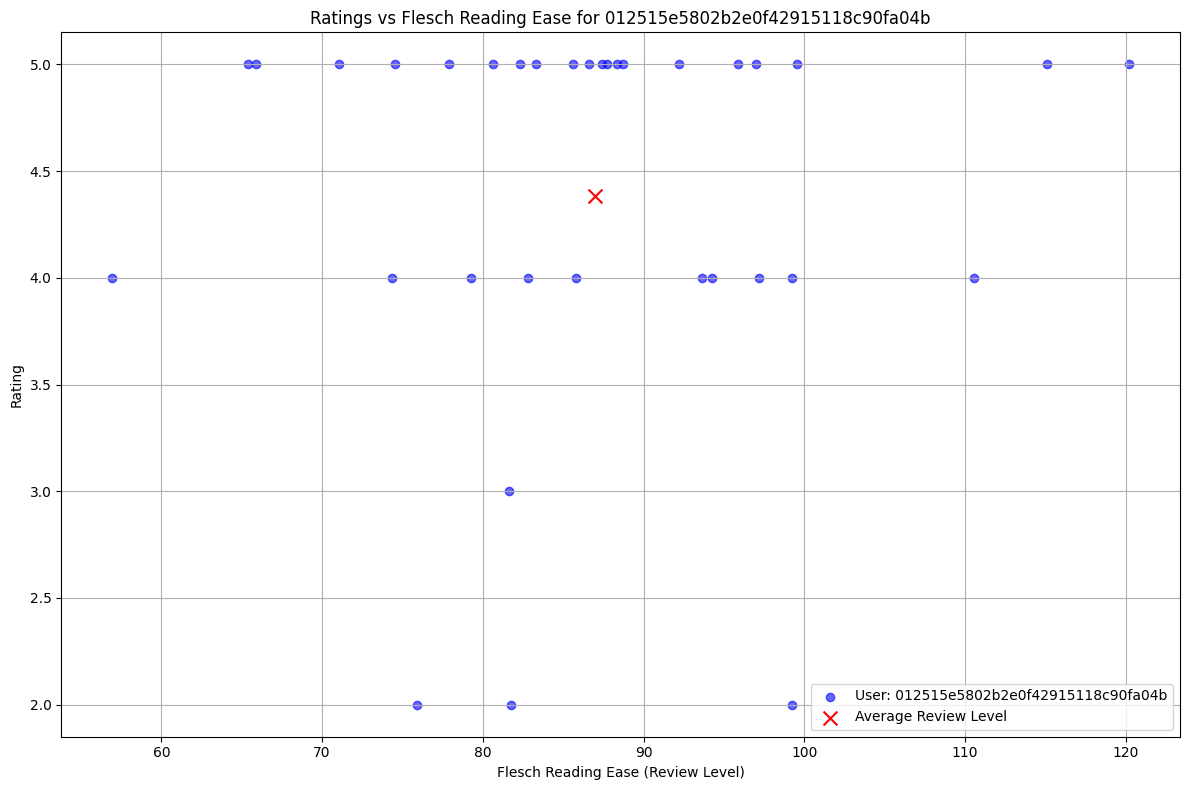

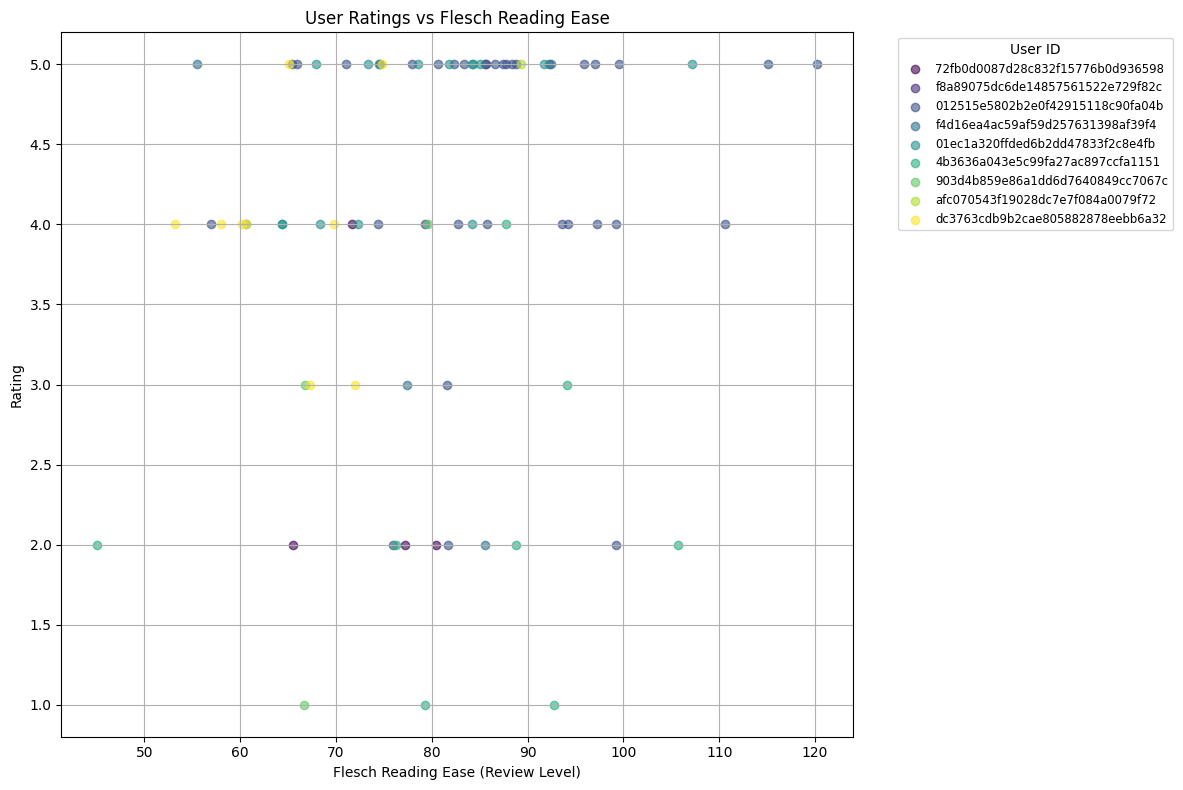

In [56]:
import textstat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

test_data = "Lots of respect for the writing style and unique world building the author is able to accomplish. The way Herbert intertwines dialogues is something like I’ve never encountered is seamless in how he weaves together the introspection of several characters. That being said there are time jumps and a lack of internal dialogue that diminish the connection to the characters and alienate Paul from the reader. The ending leaves me curious and invested as to where the author will take the series."

flesch_reading_ease = textstat.flesch_reading_ease(test_data)

chunk_size = 100
chunks = pd.read_json('./data/goodreads_reviews_fantasy_paranormal.json', lines=True, chunksize=chunk_size)

for chunk in chunks:
    df = chunk
    break  # Stop after reading the first chunk

review_df = df['review_text']
print(df.columns)

alist = review_df.apply(textstat.flesch_reading_ease)

# ------------------------------------------------------------------
# Histogram of reading level distribution

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
plt.hist(alist, bins=bins)
plt.xlabel('Value Ranges')
plt.ylabel('Frequency')
plt.title('Reading Level Frequency')
plt.show()

spoiler_df = df['rating']
plt.scatter(x=alist, y=spoiler_df)
plt.xlabel('Reading Level')
plt.ylabel('Rating')
plt.title('Reading Level / Rating Distribution')
plt.show()

id_review_rating_df = df[['user_id', 'review_text', 'rating']]


# ------------------------------------------------------------------
# Turn data frame into dictionary

review_list = []
id_list = []
id_map = {}

# Group the reviews together by user_id
for index, review in id_review_rating_df.iterrows(): 
    if review['user_id'] not in id_list:
        id_map[review['user_id']] = []
        id_list.append(review['user_id'])
    id_key = review['user_id']
    tuple_to_add = [review['review_text'], review['rating']]
    id_map[id_key].append(tuple_to_add)

# Turn review text into it's reading level score
for user_id, reviews in id_map.items():
    updated_review_map = []
    # Iterate through each tuple (review_text, rating) for the current user_id
    for review in reviews:
        review_text, rating = review  # Unpack the tuple
        review_level = textstat.flesch_reading_ease(review_text)
        new_tuple = (review_level, rating) # New tuple with review reading level instead of text
        updated_review_map.append(new_tuple)
    id_map[user_id] = updated_review_map


# ------------------------------------------------------------------
# Graph one user reading level against rating NO average

reviews_for_user = id_map.get('8842281e1d1347389f2ab93d60773d4d', [])
review_levels = [review_level for review_level, rating in reviews_for_user]
ratings = [rating for review_level, rating in reviews_for_user]
plt.scatter(review_levels, ratings)

# Add labels and title
plt.xlabel('Flesch Reading Ease (Review Level)')
plt.ylabel('Rating')
plt.title(f'User ID: {user_id} - Rating vs Review Level')

# Show the plot
plt.show()

# -------------------------------------------------------------
# Graph one user reading level against rating WITH average

target_user_id = '012515e5802b2e0f42915118c90fa04b'  # Change this to the specific user ID you want to plot

# Check if the user exists in the id_map
if target_user_id in id_map:
    reviews = id_map[target_user_id]
    
    # Unpack review levels and ratings for the selected user
    review_levels = [review_level for review_level, rating in reviews]
    ratings = [rating for review_level, rating in reviews]
    
    # Create a scatter plot
    plt.figure(figsize=(12, 8))  # Set figure size
    
    # Plot each user's data
    plt.scatter(review_levels, ratings, color='blue', label=f'User: {target_user_id}', alpha=0.6)
    
    # Calculate the average review level and rating
    avg_review_level = np.mean(review_levels)
    avg_rating = np.mean(ratings)
    
    # Plot the average review level for the user
    plt.scatter(avg_review_level, avg_rating, marker='x', s=100, color='red', label='Average Review Level')

    # Add labels and title
    plt.xlabel('Flesch Reading Ease (Review Level)')
    plt.ylabel('Rating')
    plt.title(f'Ratings vs Flesch Reading Ease for {target_user_id}')

    # Show the plot
    plt.grid()
    plt.tight_layout()  # Adjust layout
    plt.legend()  # Show legend for user and average
    plt.show()
else:
    print(f"No data found for user: {target_user_id}")

# ---------------------------------------------------------------
# All users reading level


# Create a color map for different users
colors = plt.cm.viridis(np.linspace(0, 1, len(id_map)))

# Create a scatter plot
plt.figure(figsize=(12, 8))  # Set figure size

for color, (user_id, reviews) in zip(colors, id_map.items()):
    # Unpack review levels and ratings for each user
    review_levels = [review_level for review_level, rating in reviews]
    ratings = [rating for review_level, rating in reviews]
    
    # Plot each user's data
    plt.scatter(review_levels, ratings, color=color, label=user_id, alpha=0.6)

# Add labels and title
plt.xlabel('Flesch Reading Ease (Review Level)')
plt.ylabel('Rating')
plt.title('User Ratings vs Flesch Reading Ease')

# Add a legend
plt.legend(title='User ID', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# Show the plot
plt.grid()
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

